# Deep Learning for Text 🌐
## Chapter 11 Deep Learning Book
This file contains my learning of modren architecute for processing text using deep learning for text classification, text generation. 

### Technologies to Learn
* Text Vectorization Layer
* N-Gram
* Sequence to Sequence Model
* Transformers 🤖
    * Encoder
    * Decoder


### Initaial Steps for Text Data Processing
1. Standardization --> the text to make it easier to process, such as by converting it to lowercase or removing punctuation.
2. Tokenization --> split the text into units (called tokens), such as characters, words, or groups of words. This is called tokenization.
3. Indexing -->  convert each such token into a numerical vector. This will usually involve first indexing all tokens present in the data.

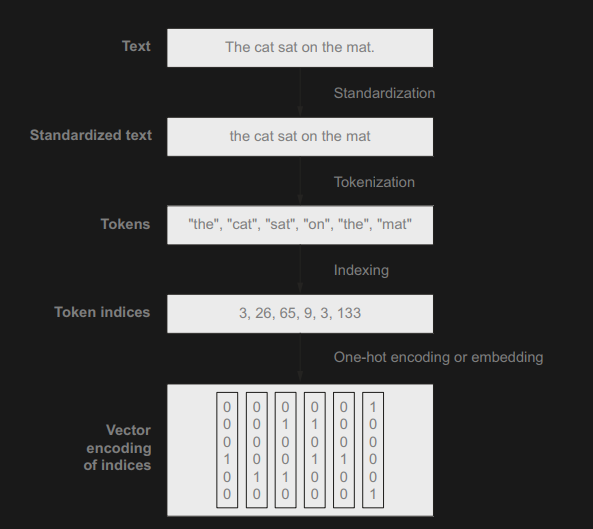

## Methods for Text Tokenization 🪙
1. Word-Level Tokenization
2. N-gram Tokenization 
3. Character-Level Tokenization ( rarely used )

In general, you’ll always use either word-level or N-gram tokenization. There are two kinds of text-processing models: those that care about word order, called "sequence models", and those that treat input words as a set, discarding their original order, called "bag-of-words models".
<br>
* If you’re building a sequence model, you’ll use "word-level" tokenization.
* If you’re building a bag-of-words model, you’ll use "N-gram tokenization".

## Method for Indexing
After tokenization we have to convert text data into numerical form so that i can be understand by computer. 
For this we can use 
1. Basic state less method like each word will have index of the length of whole text.
2. Text Vectorization Layer


#### Scratch code of text vectorization Layer

In [4]:
import string
class Vectorizer:
    def standardize(self,text):
       text = text.lower()
       return "".join(char for char in text if char not in string.punctuation) 

    def token(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocab(self, dataset):
        self.vocabulary = {"" : 0 ,'[UNK]':1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.token(text)

            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        
        self.inverse_vocabulary = dict((v,k) for k, v in self.vocabulary.items())


    def encode(self, text):
        text = self.standardize(text)
        tokens = self.token(text)
        return [self.vocabulary.get(token,1) for token in tokens]
    
    def decode(self, int_sequence):
        return " ".join(self.inverse_vocabulary.get(i,"[UNK]" )for i in int_sequence)


vector = Vectorizer()
dataset = [
"I write, erase, rewrite",
"Erase again, and then",
"A poppy blooms.",
]
vector.make_vocab(dataset)

In [5]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vector.encode(test_sentence)
print(encoded_sentence)
decoded_sentence = vector.decode(encoded_sentence)
print(decoded_sentence)



[2, 3, 5, 7, 1, 5, 6]
i write rewrite and [UNK] rewrite again


### Same but using Text Vector layer from keras

In [5]:
import tensorflow as tf 
import re
import string
from tensorflow.keras.layers import  TextVectorization
text_vectorication = TextVectorization

In [6]:
def custom_stan(string_tensor):
    lowercase = tf.strings.lower(string_tensor)
    return tf.strings.regex_replace(lowercase_string,f"[{re.escape(string.punctuation)}]","")

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)

text_vectorication = TextVectorization(
    output_mode = 'int',
    standardize = custom_standardization_fn,
    split = custom_split_fn
)

In [8]:
dataset = [
"I write, erase, rewrite",
"Erase again, and then",
"A poppy blooms.",
]
text_vectorication.adapt(dataset)

Function to retrive vocabulary

In [9]:
text_vectorication.get_vocabulary()

['',
 '[UNK]',
 'erase',
 'write',
 'then',
 'rewrite',
 'poppy',
 'i',
 'blooms',
 'and',
 'again',
 'a']

# IMDB Movie Review Classification 🎥
### Using IMDB for applying all the latest deep learning concepts

In [10]:
import os

Data is already downloaded

In [11]:
BASE_DIR = 'data'

In [15]:
train_file_path = BASE_DIR + "/train"
val_file_path = BASE_DIR + "/val"
test_file_path = BASE_DIR + "/test"

In [17]:
print(len(os.listdir(train_file_path+"/pos")),len(os.listdir(train_file_path+"/neg")))
print(len(os.listdir(val_file_path+'/pos')), len(os.listdir(val_file_path+'/neg')))
print(len(os.listdir(test_file_path+'/pos')),len(os.listdir(test_file_path+'/neg')))

10000 10000
2500 2500
12500 12500


### Data Pre-processing

In [19]:
from tensorflow import keras
batch_size = 32

#### Fetching using text_dataset_from_directory like image_dataset_from_directory

In [20]:
train_ds = keras.utils.text_dataset_from_directory(
    train_file_path, batch_size= batch_size)

val_ds = keras.utils.text_dataset_from_directory(
    val_file_path, batch_size= batch_size)

test_ds = keras.utils.text_dataset_from_directory(
    test_file_path, batch_size= batch_size)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


#### Displaying the shapes and dtypes of the first batch

In [22]:
for inputs, targets in train_ds:
    print("inputs shape", inputs.shape)
    print("inputs data types", inputs.dtype)
    print("target shapes", targets.shape)
    print('target data type' , targets.dtype)
    print("input 1" , inputs[0])
    print("targets 1" , targets[0])
    break
    

inputs shape (32,)
inputs data types <dtype: 'string'>
target shapes (32,)
target data type <dtype: 'int32'>
input 1 tf.Tensor(b'This docu-drama is what you would expect from Richard Attenborough, the man who gave us "Gandhi": beautifully photographed, compellingly casted, well written in the measured, literate manner that Hollywood discarded in the 30\'s, and scrupulously accurate. It stands out as a genre film, excelling in its portrayal of native American (or, more appropriately for its Canadian setting, "First Nations") culture and standing with "Black Robe" as a wonderfully photographed piece of Canoe Country and its culture (here, circa 1934). This idyllic portrait derives drama from its subject: Archie "Grey Owl" Belaney, a Scot raised in Hastings (England) by maiden aunts who became so obsessed with the "red indian" tales of his childhood that he went to Canada, disappeared into the woods, and became a trapper and adopted son of an Ojibway band. He was a vain man with a habit o

## Processing Words as a set 
### The bag-of-words approach 🧳

#### Uisng UniGram with Binary Encoding
First, let’s process our raw text datasets with a TextVectorization layer so that they yield multi-hot encoded binary word vectors. Our layer will only look at single
words (that is to say, unigrams).

In [24]:
text_vectorication = TextVectorization(
    max_tokens = 20000, # limiting the vocab to 20,000 most frequent words
    output_mode = 'multi_hot' # encode the output tokens as multi-hot binary vectors
)

text_only_train_ds = train_ds.map(lambda x, y : x)
text_vectorication.adapt(text_only_train_ds)


In [30]:
binary_1gram_train_ds = train_ds.map(
    lambda x, y : (text_vectorication(x), y), num_parallel_calls = 5
)

In [31]:
binary_1gram_val_ds = val_ds.map(
    lambda x, y : (text_vectorication(x), y), num_parallel_calls = 5
)

In [32]:
binary_1gram_test_ds = test_ds.map(
    lambda x, y : (text_vectorication(x), y), num_parallel_calls = 5
)

#### inspecting the output

In [34]:
for inputs, targets in binary_1gram_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    print('Lenght og the input array is',len(inputs[0])    )
    break

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'float32'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
targets[0]: tf.Tensor(1, shape=(), dtype=int32)
Lenght og the input array is 20000


#### Building the Model with Binary-Ngram

In [36]:
from tensorflow.keras import  layers
def get_model (max_tokens =20000, hidden_dim = 16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation = 'relu')(inputs)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(1, activation = 'sigmoid')(x)
    model = keras.Model(inputs,outputs)

    # compiling
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
    metrics = ['accuracy'])

    return model

#### Trainig the Model 🚂

In [42]:
uni_gram_model = get_model()
uni_gram_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_4 (Dense)             (None, 16)                320016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________


In [43]:
callbacks = [keras.callbacks.ModelCheckpoint("binary_1gram.keras",save_best_only=True)]


In [44]:
history = uni_gram_model.fit(binary_1gram_train_ds.cache(),
                    validation_data = binary_1gram_val_ds.cache(),
                    epochs = 10,
                    callbacks = callbacks)


Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3943 - accuracy: 0.8364 - val_loss: 0.2985 - val_accuracy: 0.8810
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2669 - accuracy: 0.9015 - val_loss: 0.2994 - val_accuracy: 0.8866
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2357 - accuracy: 0.9172 - val_loss: 0.3145 - val_accuracy: 0.8890
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2220 - accuracy: 0.9261 - val_loss: 0.3387 - val_accuracy: 0.8898
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2194 - accuracy: 0.9273 - val_loss: 0.3523 - val_accuracy: 0.8910
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2098 - accuracy: 0.9312 - val_loss: 0.3686 - val_accuracy: 0.8868
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2068 - accuracy: 0.9339 - val_loss: 0.3819 - val_accuracy: 0.8886
Epoch 

In [45]:
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

782/782 [==============================] - 33s 41ms/step - loss: 0.2915 - accuracy: 0.8838
Test acc: 0.884
